In [1]:
from utils import set_working_directory_up_two_levels
set_working_directory_up_two_levels()

# Results: Pretraining - Finetuning - Classification
#### Cristobal Donoso 
*last updated: 2026-01-10*

In [2]:
import os
import matplotlib.pyplot as plt
import glob

from presentation.pipelines.pipeline_0.utils import classification_metrics

from src.metrics.visualize import get_sorted_experiments, load_experiment_metrics
from src.utils import tensorboard_logs

from src.plot.training import plot_learning_curves
from src.plot.classification import aggregate_classification_results, plot_f1_scores
from src.plot.finetuning import extract_ft_metrics, plot_ft
from src.plot.general import save_plot

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

2026-01-11 21:07:57.296383: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-11 21:07:57.435380: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-11 21:07:58.120529: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-11 21:07:58.120598: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-11 21:07:58.122425: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
results_directory = './presentation/results/v2/'
model_paths = glob.glob(os.path.join(results_directory, 'pretraining'))

In [4]:
sorted_path, sorted_labels = get_sorted_experiments(model_paths)
sorted_path

['./presentation/results/v2/pretraining']

### Pretraining

In [94]:
t_metrics, v_metrics = load_experiment_metrics(sorted_path, tensorboard_logs)

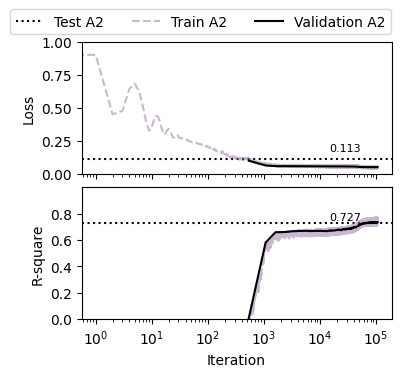

In [103]:
fig, axes = plt.subplots(2, 1, figsize=(4, 3.6), dpi=100, sharex=True, gridspec_kw={'wspace':0.2, 'hspace':0.1})
colormap = ['k', 'gray', 'b', 'g', 'y']

subset_slice = slice(0, 1)

# 4. Generate Plot
fig, axes = plot_learning_curves(
    train_metrics=t_metrics[subset_slice],
    val_metrics=v_metrics[subset_slice],
    paths=sorted_path[subset_slice],
    labels=sorted_labels[subset_slice],
    fig=fig, axes=axes
)

In [56]:
save_plot(fig, './presentation/figures/pretraining/tr_astromer_2.pdf')

Plot saved successfully at: ./presentation/figures/pretraining/tr_astromer_2.pdf


### Finetuning

In [247]:
ft_metrics = extract_ft_metrics('./presentation/results/v2/finetuning')

[INFO] Buscando resultados en: ./presentation/results/v2/finetuning


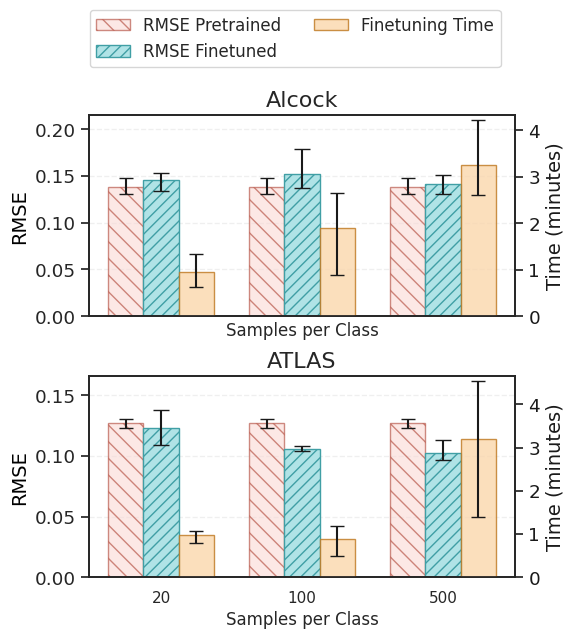

In [328]:
fig, axes = plt.subplots(2, 1, figsize=(5.5, 6), sharex=True, sharey=False, 
gridspec_kw={'hspace':0.3})
fig = plot_ft(ft_metrics, fig, axes)

In [329]:
save_plot(fig, './presentation/figures/pretraining/ft_metrics.pdf')

Plot saved successfully at: ./presentation/figures/pretraining/ft_metrics.pdf


### Classification

In [ ]:
RESULTS_DIR = './presentation/results/v1/'
PLOT_CONFIG = {
    'v2': {
        'ylim': {'alcock': (0.45, 0.8), 'atlas': (0.45, 0.85)},
        'figsize': (6, 2)
    }
}
current_config = PLOT_CONFIG.get('v2', {'ylim': {'alcock':(0,1), 'atlas':(0,1)}, 'figsize':(6,2)})

# Definitions for baselines (Paper vs New)
baselines = [
    {'path': RESULTS_DIR, 'label': 'Donoso\net.al\n(2023)', 'arch': 'avg_mlp'},
    {'path': RESULTS_DIR, 'label': 'A1', 'arch': 'skip_avg_mlp'}
]

# We use the loader function we created to merge everything cleanly
full_metrics_df = aggregate_classification_results(
    baseline_paths=baselines,
    experiment_paths=sorted_path, # Using your slicing logic
    experiment_labels=sorted_labels,
    metric_loader_func=classification_metrics
)

Plot saved successfully at: ./presentation/figures/classification/alcock.pdf
Plot saved successfully at: ./presentation/figures/classification/alcock.png
Plot saved successfully at: ./presentation/figures/classification/atlas.pdf
Plot saved successfully at: ./presentation/figures/classification/atlas.png


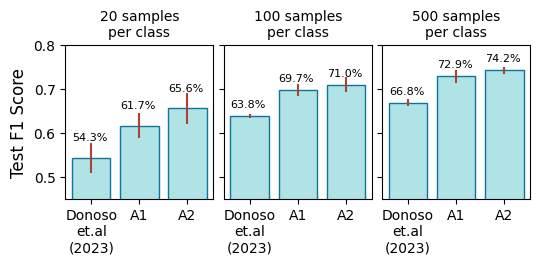

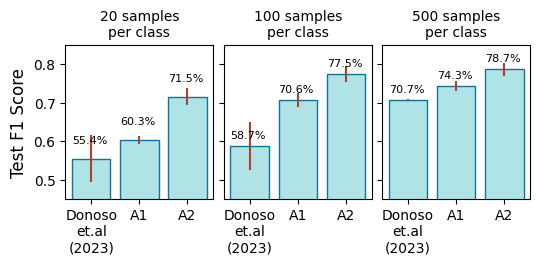

In [10]:
for dataset_name, df_subset in full_metrics_df.groupby('data'):
    
    # Get Y-limits specific to this dataset (alcock/atlas)
    y_limits = current_config['ylim'].get(dataset_name, (0, 1))
    
    # Create Figure
    fig, axes = plt.subplots(1, 3, figsize=current_config['figsize'], 
                             sharey=True, dpi=100, gridspec_kw={'wspace': 0.07})
    
    # Plot
    fig, axes = plot_f1_scores(
                    df=df_subset,
                    dataset_name=dataset_name,
                    ylim=y_limits,
                    fig=fig,
                    axes=axes
                )

    save_plot(fig, path='./presentation/figures/classification/{}.pdf'.format(dataset_name))
    save_plot(fig, path='./presentation/figures/classification/{}.png'.format(dataset_name))
    